# Project 5 - Michael Young


#### Topics Covered

1)	What is Machine Learning
    + Supervised
        - Classification: Predicting discrete labels
        - Regression: Predicting continuous labels
    + Unsupervised
        - Clustering: Inferring labels on unlabeled data
        - Dimensionality reduction: Inferring structure of unlabeled data
2)	Scikit-Learn
    + Data Representation
    + Scikit-Learn's Estimator API
        - The implementation of this did not produce good results because my data did not have any clear seperation like I thought it would have.
3)	Hyperparameters and Model Validation
    + Model Validation
        - Holdout Sets
        - Cross-validation
    + Select Best Model (Done in the Chapter 5 Example)
        - Validation Curves
        - Learning Curves
    + Hyperparameter Tuning (Done in the Chapter 5 Example)
        - Grid Search
4)	Feature Engineering
    + Categorical Features
    + Text Features
    + Image Features (Covered in Chapter 5 Example)
    + Derived Features
    + Imputation of Missing Data
    + Feature Pipelines
5)	In Depth: Support Vector Machines (SVM)
    + SVM model
    + Image Features using HOG (Histogram of Oriented Gradients)
    + Select Best Model (From Chapter 3)
        - Validation Curves
        - Learning Curves
    + Hyperparameter Tuning (From Chapter 3)
        - Grid Search

In [294]:
#IMPORT ALL LIBRARIES
%matplotlib inline
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.svm import SVC
np.set_printoptions(threshold=sys.maxsize)
import warnings; warnings.simplefilter('ignore')

### Chapter 1 - What is Machine Learning
+ Supervised
    - Classification: Predicting discrete labels
    - Regression: Predicting continuous labels
+ Unsupervised
    - Clustering: Inferring labels on unlabeled data
    - Dimensionality reduction: Inferring structure of unlabeled data

#### Supervised: Classification Example
This example shows a linear svc model to determine whether a hit is a single or home run based on the features, launch angle and hit distance, of the hit

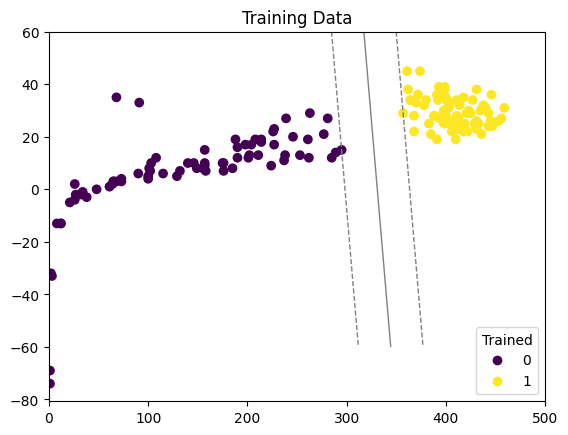

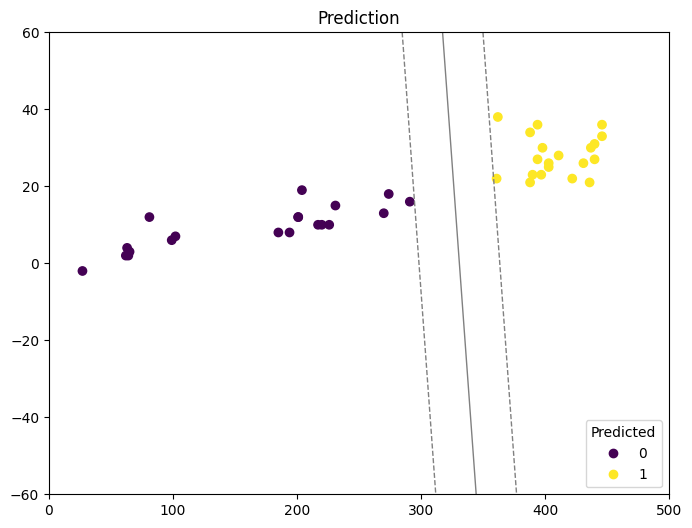

In [295]:
# Chapter 1
# Supervised: Classification
player = pd.read_csv("Shohei4.csv").dropna()

homerun = player.loc[player.events == "home_run"].sample(n=75)
single = player.loc[player.events == "single"].sample(n=len(homerun))

x = pd.concat([single,homerun], ignore_index=True)
x = x.replace(["single", "home_run"], [0,1])
fig = plt.figure()
ax = plt.axes()
data = pd.concat([x.hit_distance_sc, x.launch_angle], axis=1)

#Train model
model = SVC(kernel='linear')
model.fit(data, x.events)

train = plt.scatter(x.hit_distance_sc, x.launch_angle, c=x.events)

xx = np.linspace(0, 500, 250)
yy = np.linspace(-60, 60, 80)
xy1, xy2 = np.meshgrid(xx, yy)
Z = np.array([model.decision_function([t]) for t in zip(xy1.flat, xy2.flat)]).reshape(xy1.shape)
line_style = dict(levels = [-1.0, 0.0, 1.0],
                  linestyles = ['dashed', 'solid', 'dashed'],
                  colors = 'gray', linewidths=1)
plt.title("Training Data")
plt.contour(xy1, xy2, Z, **line_style)
legend1 = ax.legend(*train.legend_elements(), loc="lower right", title="Trained")
plt.show()

# Supervised: Regression
fig, ax = plt.subplots(figsize=(8, 6))
homerun2 = player.loc[player.events == "home_run"].sample(n=20)
single2 = player.loc[player.events == "single"].sample(n=len(homerun2))
x2 = pd.concat([single2,homerun2], ignore_index=True)
data2 = pd.concat([x2.hit_distance_sc, x2.launch_angle], axis=1)
data2 = data2.sample(len(data2)) #Shuffle

predicted = model.predict(data2)

predict = ax.scatter(data2.hit_distance_sc, data2.launch_angle, c=predicted)
plt.title("Prediction")
plt.contour(xy1, xy2, Z, **line_style)
legend2 = ax.legend(*predict.legend_elements(), loc="lower right", title="Predicted")
plt.show()

#### Supervised: Regression Example
This data in this example is the NBA draft picks since 1989 and the player's score, games played, and avg points per game. By using a linear regression model, I was able to make a model that colors the scatter plot by points per game of each player from the random selection.

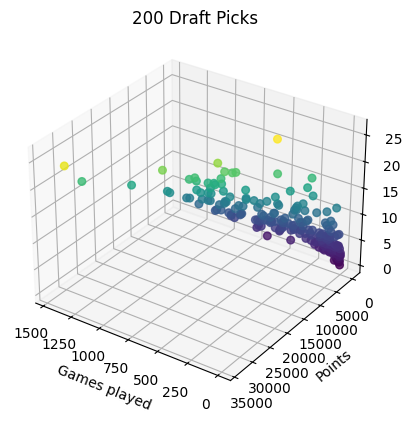

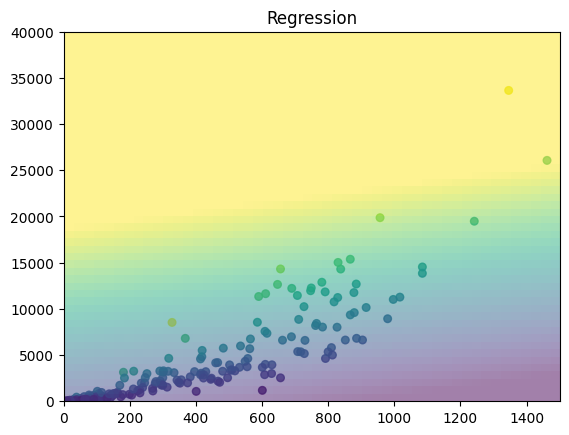

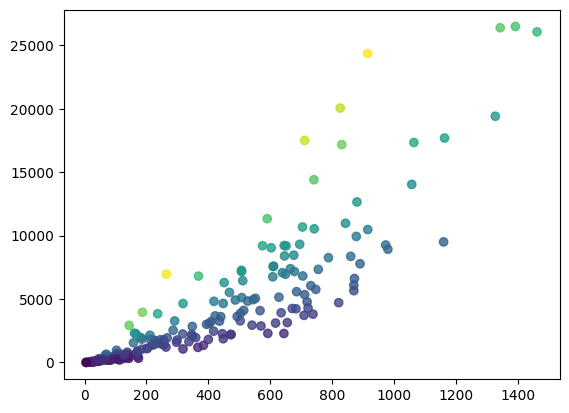

In [312]:
# Regression
from sklearn.linear_model import LinearRegression

fig = plt.figure()
ax = plt.axes(projection='3d')
nba = pd.read_csv('nbaplayersdraftcut.csv').dropna().sample(200) #pick 200 random players
#sns.pairplot(nba, hue = 'overall_pick')

X = pd.concat([nba.games, nba.points], axis=1).to_numpy()
y = nba.points_per_game.to_numpy()
ax.scatter(X[:, 0], X[:, 1], y, c=nba.points_per_game, s=30, alpha=.8)

ax.view_init(30, 180-55)
plt.title('200 Draft Picks')
plt.xlabel('Games played')
plt.ylabel('Points')
plt.show()

#Train Model
model = LinearRegression()
model.fit(X, y)

#Predict Model
fig = plt.figure()
ax = plt.axes()
play = ax.scatter(X[:, 0], X[:, 1], c=nba.points_per_game, s=30, alpha=.8)

nba2 = pd.read_csv('nbaplayersdraftcut.csv').dropna().sample(50) #pick 200 random players

xx, yy = np.meshgrid(np.linspace(0, 1500, 50), np.linspace(0, 40000, 50))
xy1, xy2 = np.meshgrid(xx, yy)
gamesFit = np.vstack([xx.ravel(), yy.ravel()]).T
pointsFit = model.predict(gamesFit)
rank = pointsFit.reshape(xx.shape)

ax.pcolorfast([0, 1500], [0, 40000], rank, alpha=0.5, cmap='viridis', norm=play.norm, zorder=1)

plt.title("Regression")
plt.show()

fig = plt.figure()
ax = plt.axes()
nba2 = pd.read_csv('nbaplayersdraftcut.csv').dropna().sample(200) #pick 200 random players
X2 = pd.concat([nba2.games, nba2.points], axis=1).to_numpy()
y2 = nba2.points_per_game.to_numpy()
ax.scatter(X2[:, 0], X2[:, 1], c=y2, alpha=.8)
plt.show()

#### Unsupervised: Clustering Example
This example shows a cluster model that can determine a fruit based on its weight and volume.

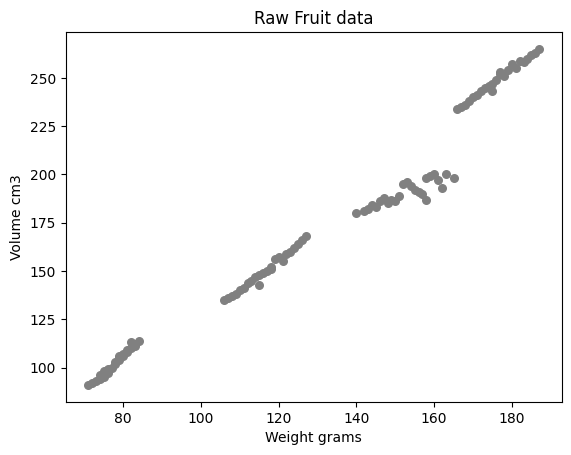

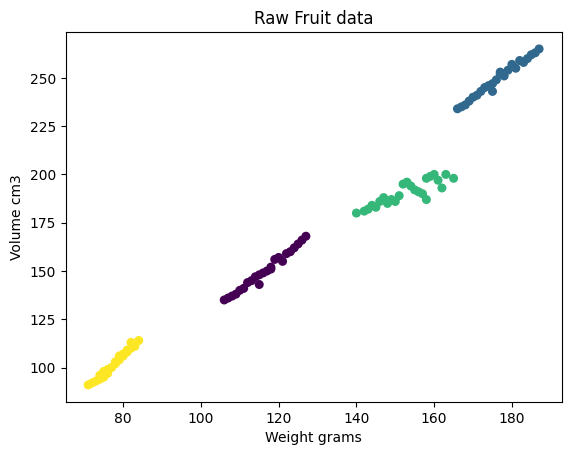

In [297]:
# Clustering
from sklearn.cluster import KMeans

fruit = pd.read_csv('fruit.csv').dropna()

X = pd.concat([fruit.weight_g, fruit.volume_cm3], axis=1).to_numpy()
y = fruit.fruit.to_numpy()

model = KMeans(4, random_state=0)
y = model.fit_predict(X)

fig = plt.figure()
ax = plt.axes()
ax.scatter(X[:, 0], X[:, 1], s=30, color='gray')
plt.title("Raw Fruit data")
plt.xlabel("Weight grams")
plt.ylabel("Volume cm3")
plt.show()

fig = plt.figure()
ax = plt.axes()
ax.scatter(X[:, 0], X[:, 1], c=y, s=30)
plt.title("Raw Fruit data")
plt.xlabel("Weight grams")
plt.ylabel("Volume cm3")
plt.show()

#### Unsupervised: Dimensionality Example
For this example, I found some data from a horse race. I was able to use the Isomap model to fit a colormap to the path of the horse.

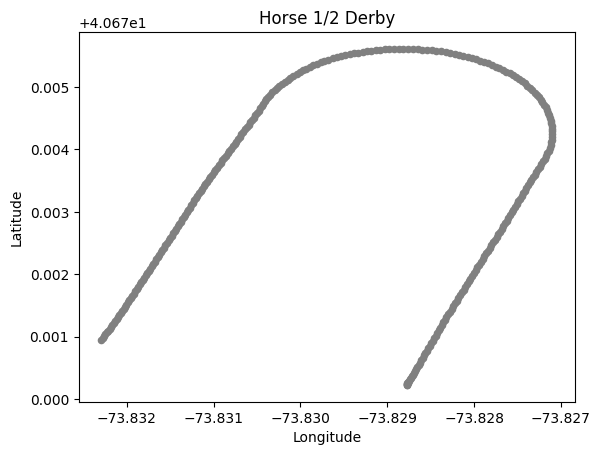

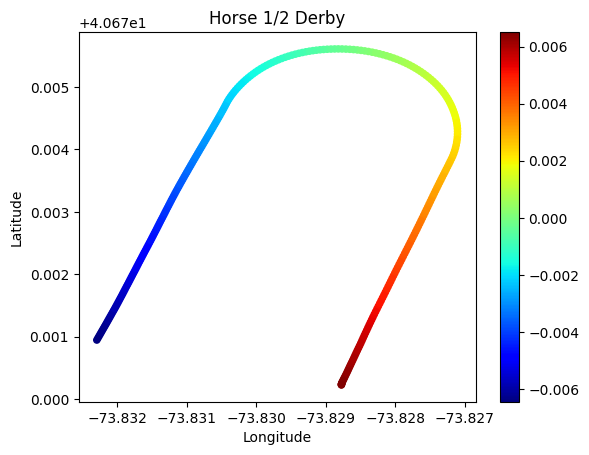

In [298]:
# Dimensionality
from sklearn.manifold import Isomap

horse = pd.read_csv('horse1.csv')
#sns.pairplot(horse, hue = 'program_number')
X = pd.concat([horse.longitude, horse.latitude], axis=1).to_numpy()

fig = plt.figure()
ax = plt.axes()

ax.scatter(X[:, 0], X[:, 1], color='gray', s=20)
plt.title('Horse 1/2 Derby')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

model = Isomap(n_neighbors=3, n_components=1)
y_fit = model.fit_transform(X).ravel()

fig = plt.figure()
ax = plt.axes()

track = ax.scatter(X[:, 0], X[:, 1], c=y_fit, cmap='jet', s=20)
plt.title('Horse 1/2 Derby')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(track)
plt.show()

### Chapter 2 - Scikit-Learn
+ Data Representation
+ Scikit-Learn's Estimator API
    - The implementation of this did not produce good results because my data did not have any clear seperation like I thought it would have.

        Position  HeightInch  WeightLbs    Age
0        Catcher          74      180.0  22.99
1        Catcher          74      215.0  34.69
2        Catcher          72      210.0  30.78
3  First_Baseman          72      210.0  35.43
4  First_Baseman          73      188.0  35.71
Data Feature shape: (1033, 3) 
Data Labels shape: (1033,)


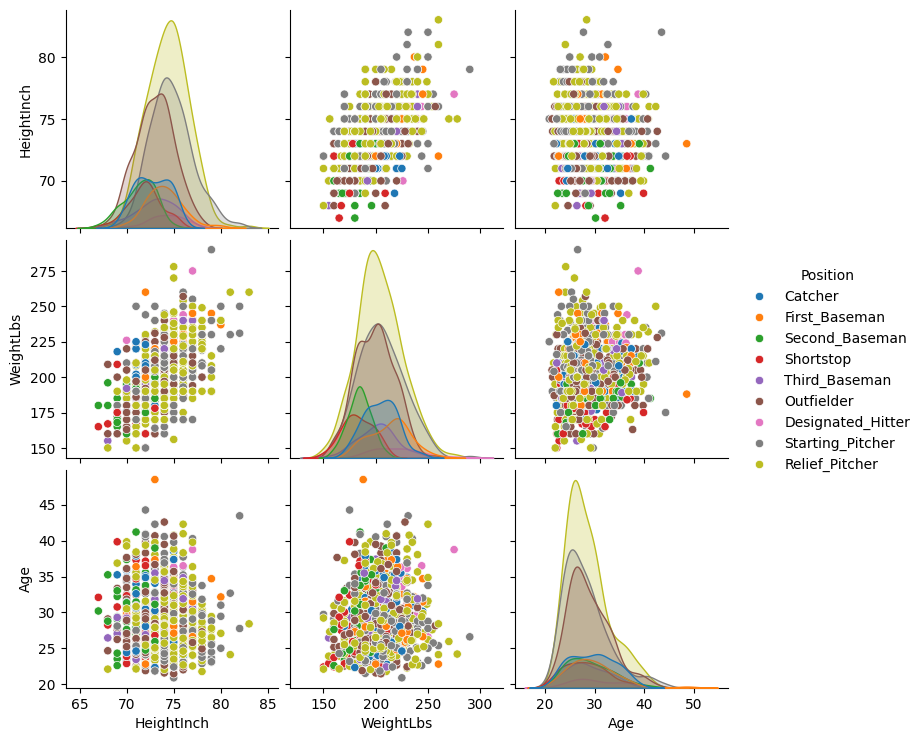

In [299]:
# Chapter 2
# Data Representation
baseball = pd.read_csv('baseball_players.csv').dropna()
print(baseball.head())
sns.pairplot(baseball, hue = 'Position')
X = pd.concat([baseball.HeightInch, baseball.WeightLbs, baseball.Age], axis=1).to_numpy()
y = baseball.Position

print("Data Feature shape:", X.shape, '\nData Labels shape:', y.shape)

Model Coefficient:
 [ 0.  0.  0.  1.  1.  1.  0.  0.  1.  1.  0.  0.  0.  1.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.  0.
  1.  0.  1.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  1.  0.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -0. -0. -0. -1. -1. -0.
 -0. -1. -1. -1. -0. -0. -0. -0. -1. -0. -0. -0. -0. -1. -1. -0. -1. -1.
 -1. -1. -0. -0. -0. -1. -0. -0. -0. -0. -0. -0. -1. -0. -0. -1. -1. -0.
 -0. -1. -1. -0. -0. -0. -1. -1. -1. -0. -1. -0. -0. -1. -0. -0. -0. -1.
 -1. -0. -0. -0. -0. -0. -0. -0. -1. -0. -1. -1. -0. -0. -1. -0. -0. -0.
 -0. -0. -0. -1. -0. -0. -0. -0

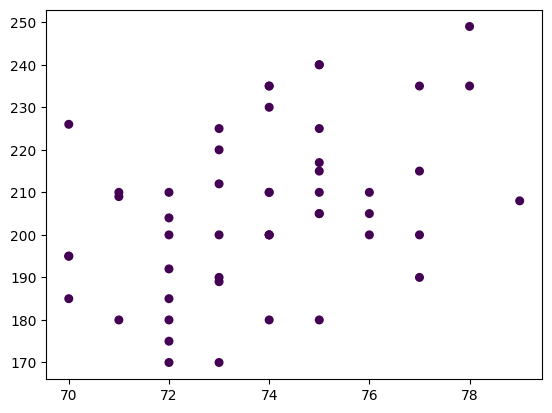

In [300]:
# Estimator API
def to_int(arr):
    retArr = np.zeros(len(arr))
    count = 0
    for i in arr:
        if i == "Starting_Pitcher": retArr[count] = 1
        elif i == "Relief_Pitcher": retArr[count] = 2
        elif i == "Catcher": retArr[count] = 3
        elif i == "First_Baseman": retArr[count] = 4
        elif i == "Second_Baseman": retArr[count] = 5
        elif i == "Shortstop": retArr[count] = 6
        elif i == "Third_Baseman": retArr[count] = 7
        elif i == "Outfielder": retArr[count] = 8
        elif i == "Designated_Hitter": retArr[count] = 9
        count +=1
    return retArr

# 1) Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
from sklearn import svm

# 2) Choose model hyperparameters by instantiating this class with desired values.
model = svm.SVC(kernel='sigmoid')

# 3) Arrange data into a features matrix and target vector following the discussion above.
feature = pd.concat([baseball.HeightInch, baseball.WeightLbs, baseball.Age], axis=1).to_numpy()
label = baseball.Position

# 4) Fit the model to your data by calling the fit() method of the model instance.
model.fit(feature, label)
coef = model.dual_coef_
print("Model Coefficient:\n", coef[0])
print("Model Y Intercept:\n", model.intercept_)
print("Model Iterations to fit:\n", model.n_iter_)

# 5) Apply the Model to new data:
newdata = pd.concat([baseball.HeightInch, baseball.WeightLbs, baseball.Age], axis=1).dropna().sample(n=50).to_numpy()

x = np.linspace(60, 90)

prediction = model.predict(newdata)
predcolor = to_int(prediction)

fig = plt.figure()
ax = plt.axes()
ax.scatter(newdata[:,0], newdata[:,1], c=predcolor, s = 30)
plt.show()


### Chapter 3 - Hyperparameters and Model Validation
+ Model Validation
    - Holdout Sets
    - Cross-validation
+ Select Best Model (Done in the Chapter 5 Example)
    - Validation Curves
    - Learning Curves
+ Hyperparameter Tuning (Done in the Chapter 5 Example)
    - Grid Search

In [301]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [302]:
# Chapter 3
# Model Validation

# Using data from My Supervised Classification Example
# Holdout sets
print("Predictive Model for determining if a hit is a single or double:")
double = player.loc[player.events == "double"]
single = player.loc[player.events == "single"]
data = pd.concat([single, double], ignore_index=True)
X = pd.concat([data.hit_distance_sc, data.launch_angle], axis=1).to_numpy()
y = data.events

dataFit, dataTest, labelFit, labelTest = train_test_split(X, y, random_state=0, train_size=0.6)
print("Split Data 60/40:")
print("DataFit shape:", dataFit.shape)
print("DataTest shape:", dataTest.shape)

model = SVC(kernel='linear')
model.fit(dataFit, labelFit)

testModel = model.predict(dataTest)
print("\nHoldout set prediction accuracy:")
print(accuracy_score(labelTest, testModel)*100)

# Cross-validation
print("\nCross-validation performance:")
modelFit = model.fit(dataFit, labelFit).predict(dataTest)
modelTest = model.fit(dataTest, labelTest).predict(dataFit)
print(accuracy_score(labelFit, modelTest) * 100)
print(accuracy_score(labelTest, modelFit) * 100)

Predictive Model for determining if a hit is a single or double:
Split Data 60/40:
DataFit shape: (324, 2)
DataTest shape: (216, 2)

Holdout set prediction accuracy:
87.5

Cross-validation performance:
82.09876543209876
87.5


### Chapter 4 - Feature Engineering
+ Categorical Features
+ Text Features
+ Derived Features
+ Image Features (Covered in Chapter 5 Example)
+ Imputation of Missing Data
+ Feature Pipelines

In [303]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

In [304]:
# Chapter 4
# Feature Engineering

# Categorical Features ==============================================
print("Categorical Features:")
catData = player.drop(['player_name', 'pitcher', 'p_throws', 'pitch_name'], axis=1)
print(catData.head())

catData = catData.to_dict(orient='records')
vec = DictVectorizer(sparse=False, dtype=int)
vec.fit_transform(catData)
print(vec.feature_names_)

# Text Features ======================================================
print("\nText Features:")
bee_movie_script = [
    "according to all known laws of aviation",
    "there is no way a bee should be able to fly",
    "its wings are too small to get its fat little body off the ground",
    "the bee of course flies anyway",
    "because bees dont care what humans think is impossible",
    "yellow black yellow black yellow black yellow black",
    "ooh black and yellow"]
vec = CountVectorizer()
X = vec.fit_transform(bee_movie_script)
print(pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out()))

vec = TfidfVectorizer()
X = vec.fit_transform(bee_movie_script)
print(pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out()))

Categorical Features:
     events  release_speed  hit_distance_sc  launch_speed  launch_angle  \
0    single           91.4               21         114.1            -5   
1  home_run           95.9              380         103.0            34   
2    single           86.2              162         113.5             8   
3    triple           87.3               32         102.1            -2   
4    single           83.6              157          73.0            15   

   bat_score  post_bat_score  delta_run_exp  
0          2               3            0.9  
1          7               9            2.0  
2          0               0            0.9  
3          1               1            1.6  
4          0               0            0.9  
['bat_score', 'delta_run_exp', 'events=double', 'events=home_run', 'events=single', 'events=triple', 'hit_distance_sc', 'launch_angle', 'launch_speed', 'post_bat_score', 'release_speed']

Text Features:
   able  according  all  and  anyway  are  aviat

Derived Features:


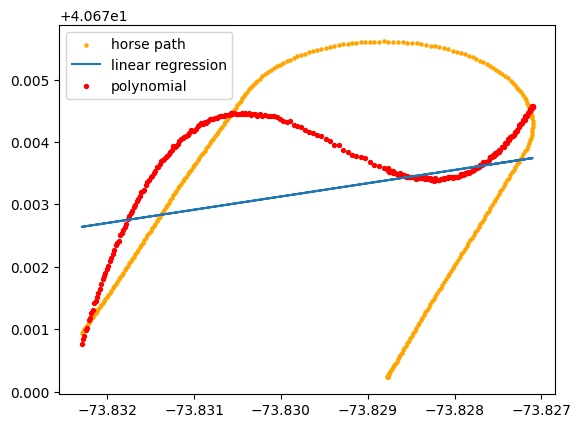


Imputation of Missing Data using nfl combine data:
    40yd  Vertical  Bench  Broad Jump  3Cone  Shuttle
0   NaN       NaN    NaN         NaN    NaN      NaN
1  4.47      36.5    NaN       129.0    NaN      NaN
2  4.32      33.0    NaN         NaN    NaN      NaN
3  4.49      34.0    NaN       122.0    NaN      NaN
4  4.49      37.5   27.0       125.0    NaN      NaN
       40yd   Vertical      Bench  Broad Jump     3Cone   Shuttle
0  4.689429  33.834783  19.950495  119.422907  7.303827  4.477755
1  4.470000  36.500000  19.950495  129.000000  7.303827  4.477755
2  4.320000  33.000000  19.950495  119.422907  7.303827  4.477755
3  4.490000  34.000000  19.950495  122.000000  7.303827  4.477755
4  4.490000  37.500000  27.000000  125.000000  7.303827  4.477755
[[159.        ]
 [156.51143946]
 [158.57549804]
 [157.98367098]
 [179.94315503]] ...

Feature Pipeline Prediction using raw nfl combine data:
[[164.48569551]
 [156.32159942]
 [173.23797529]
 [155.66056309]
 [201.06714025]] ...


In [305]:
# Derived Features
print('Derived Features:')
x = horse.longitude.to_numpy()
y = horse.latitude.to_numpy()
X = x[:, np.newaxis]
model = LinearRegression().fit(X, y)
yfit = model.predict(X)
plt.scatter(x, y, s=5, c='orange', label='horse path')
plt.plot(x, yfit, label='linear regression')

poly = PolynomialFeatures(degree=3, include_bias=False)
X2 = poly.fit_transform(X)

model = LinearRegression().fit(X2, y)
yfit = model.predict(X2)
plt.scatter(x, yfit, s=8, c='red', label='polynomial')
plt.legend()
plt.show()

# Imputation of Missing Data
combine = pd.read_csv('2023Combine.csv').drop(['Player', 'Ht', 'Wt', 'Pos', 'School', 'College', 'Drafted (tm/rnd/yr)', 'Player-additional'], axis=1)
print("\nImputation of Missing Data using nfl combine data:\n", combine.head())
imp = SimpleImputer(strategy='mean')
imputed = imp.fit_transform(combine)
df2 = pd.DataFrame(imputed, columns=['40yd', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle'])
print(df2.head())

model = LinearRegression().fit(imputed, combine.index)
result = model.predict(imputed[0:5])
print(result[:, np.newaxis], "...")

# Feature Pipelines
print("\nFeature Pipeline Prediction using raw nfl combine data:")
model = make_pipeline(SimpleImputer(strategy='mean'), PolynomialFeatures(degree=3), LinearRegression())
model.fit(combine, combine.index)
a = model.predict(combine)[:, np.newaxis]
print(a[0:5], "...")


### Chapter 5 - In Depth: Support Vector Machines (SVM)
+ SVM model
+ Image Features using HOG (Histogram of Oriented Gradients)
+ Select Best Model (From Chapter 3)
    - Validation Curves
    - Learning Curves
+ Hyperparameter Tuning (From Chapter 3)
    - Grid Search

####

In [306]:
# Chapter 5
# Attempt 2 at Spell Classification from ECE 674
import cv2
from skimage import feature

# local module
from common import mosaic

# Globals
SZ = 50 # size of individual spell
CLASS_N = 5 # number of spells to train

# Definitions to clean up the image and put them into an arry ==========
def split2d(img, cell_size, flatten=True):
    h, w = img.shape[:2]
    sx, sy = cell_size
    cells = [np.hsplit(row, w//sx) for row in np.vsplit(img, h//sy)]
    cells = np.array(cells)
    if flatten:
        cells = cells.reshape(-1, sy, sx)
    return cells

def deskew(img):
    m = cv2.moments(img)
    if abs(m['mu02']) < 1e-2:
        return img.copy()
    skew = m['mu11']/m['mu02']
    M = np.float32([[1, skew, -0.5*SZ*skew], [0, 1, 0]])
    img = cv2.warpAffine(img, M, (SZ, SZ), flags=cv2.WARP_INVERSE_MAP | cv2.INTER_LINEAR)
    return img

def load_spells(filename):
    spells_img = cv2.imread(filename, 0)
    spells = split2d(spells_img, (SZ, SZ))
    labels = np.repeat(np.arange(CLASS_N), len(spells)/CLASS_N)
    return spells, labels

# Definition for the model =============================================
def svmInit(Cval=40, Gval=0.7):
    model = SVC(C=Cval, gamma = Gval, kernel='rbf', probability=True)
    return model

# Grid Search ==========================================================
def learn_curve(data, labels):
    from sklearn.svm import SVC
    from sklearn.decomposition import PCA
    from sklearn.model_selection import train_test_split
    from sklearn.pipeline import make_pipeline
    
    pca = PCA(n_components=25, whiten=True, svd_solver='randomized', random_state=42)
    svc = SVC(kernel='rbf', class_weight='balanced')
    model = make_pipeline(pca, svc)
    
    Xtrain, Xtest, ytrain, ytest = train_test_split(data, labels, random_state=42)
    
    from sklearn.model_selection import GridSearchCV
    param_grid = {'svc__C': [1, 12, 25, 60, 100],#list(range(1, 50, 5)),
                  'svc__gamma': [0.35, 0.4, 0.45, 0.5, 0.56]}#[x / 10000.0 for x in range(0, 10000, 400)]}
    grid = GridSearchCV(model, param_grid)
    
    %time grid.fit(Xtrain, ytrain)
    print(grid.best_params_)
    bestC = grid.best_params_['svc__C']
    bestGamma = grid.best_params_['svc__gamma']

    model = grid.best_estimator_
    yfit = model.predict(Xtest)

    return bestC, bestGamma

# Main =================================================================
if __name__ == '__main__':
    print('Loading spells from spells.png ... ')
    spells, labels = load_spells('train_spells.jpg')

    print('Shuffling data ... ')
    rand = np.random.RandomState(10)
    shuffle = rand.permutation(len(spells))
    spells, labels = spells[shuffle], labels[shuffle]
    
    print('Deskew images ... ')
    spells_deskewed = list(map(deskew, spells))
    
    print('Calculating HoG descriptor for every image ... ')
    hog_descriptors = []
    for i in range(0,100):
        hog_vec = feature.hog(spells_deskewed[i], visualize=False)
        hog_descriptors.append(hog_vec)
    hog_descriptors = np.squeeze(hog_descriptors)

    print('Spliting data into training (90%) and test set (10%)... ')
    train_n=int(0.9*len(hog_descriptors))
    spells_train, spells_test = np.split(spells_deskewed, [train_n])
    hog_descriptors_train, hog_descriptors_test = np.split(hog_descriptors, [train_n])
    labels_train, labels_test = np.split(labels, [train_n])
    

    print('Training SVM model ...')
    model = svmInit()
    model.fit(hog_descriptors_train, labels_train)
    print("Trained.\n")
    
    print("SVM model parameters:", model)
    testModel = model.predict(hog_descriptors_test)
    probability = model.predict_proba(hog_descriptors_test)
    print("Actual label:   ", labels_test)
    print("Predicted label: [", end='')
    for i in range(len(testModel)):
        if testModel[i] == labels_test[i]: print(testModel[i], end='')
        else: print(f"\033[91m{testModel[i]}\033[0m", end='')
        if i != len(testModel)-1: print(" ", end='')
    print("]")

    print("Probabilities for each prediction:")
    for i in range(len(testModel)):
        if testModel[i] == labels_test[i]: print((probability[i]))
        else: print(f"\033[91m{probability[i]}\033[0m")

    print("\nHoldout set prediction accuracy:")
    print(accuracy_score(labels_test, testModel)*100, "%")


Loading spells from spells.png ... 
Shuffling data ... 
Deskew images ... 
Calculating HoG descriptor for every image ... 
Spliting data into training (90%) and test set (10%)... 
Training SVM model ...
Trained.

SVM model parameters: SVC(C=40, gamma=0.7, probability=True)
Actual label:    [0 3 0 1 4 4 1 3 0 0]
Predicted label: [1 3 0 1 4 4 1 1 1 0]
Probabilities for each prediction:
[0.22660452 0.26997777 0.14033787 0.11954362 0.24353622]
[0.13694644 0.14586584 0.07455267 0.51460431 0.12803074]
[0.39157966 0.20888137 0.13870217 0.08029082 0.18054598]
[0.14239703 0.69226111 0.04720205 0.04861633 0.06952348]
[0.17892616 0.1897901  0.08391498 0.09236888 0.45499988]
[0.18538711 0.22252879 0.09765048 0.10416488 0.39026874]
[0.18512779 0.42490625 0.10219781 0.10189513 0.18587303]
[0.19130138 0.27354188 0.12481496 0.16316676 0.24717503]
[0.28204026 0.24009081 0.16127277 0.10270584 0.21389032]
[0.38621007 0.21869584 0.12059277 0.08413097 0.19037035]

Holdout set prediction accuracy:
70.0 %


In [307]:
# Grid Search
print("Grid Search for C and gamma")
c, g = learn_curve(hog_descriptors, labels)

print('\nTraining SVM model ...')
model = svmInit(c, g)
model.fit(hog_descriptors_train, labels_train)
print("Trained.\n")

print("SVM model parameters:", model)
testModel = model.predict(hog_descriptors_test)
probability = model.predict_proba(hog_descriptors_test)
print("Actual label:   ", labels_test)
print("Predicted label: [", end='')
for i in range(len(testModel)):
    if testModel[i] == labels_test[i]: print(testModel[i], end='')
    else: print(f"\033[91m{testModel[i]}\033[0m", end='')
    if i != len(testModel)-1: print(" ", end='')
print("]")

print("Probabilities for each prediction:")
for i in range(len(testModel)):
    if testModel[i] == labels_test[i]: print((probability[i]))
    else: print(f"\033[91m{probability[i]}\033[0m")

print("\nHoldout set prediction accuracy:")
print(accuracy_score(labels_test, testModel)*100, "%")

Grid Search for C and gamma
CPU times: total: 5.41 s
Wall time: 1.76 s
{'svc__C': 12, 'svc__gamma': 0.35}

Training SVM model ...
Trained.

SVM model parameters: SVC(C=12, gamma=0.35, probability=True)
Actual label:    [0 3 0 1 4 4 1 3 0 0]
Predicted label: [0 3 0 1 4 4 1 3 0 0]
Probabilities for each prediction:
[0.74967719 0.06187955 0.0895622  0.03943642 0.05944464]
[0.02380826 0.03284161 0.02307923 0.88478355 0.03548736]
[0.96183942 0.00490765 0.02391577 0.00432004 0.00501711]
[0.00380266 0.98638715 0.00329156 0.00413879 0.00237984]
[0.04135737 0.04067378 0.0321899  0.03895712 0.84682184]
[0.03909138 0.03849523 0.03073012 0.03669047 0.8549928 ]
[0.04205294 0.86499484 0.0293808  0.03267216 0.03089926]
[0.12281183 0.19813421 0.08485657 0.45082104 0.14337636]
[0.86823816 0.02305077 0.06708698 0.0176553  0.02396879]
[0.95123679 0.00860304 0.02202895 0.00782236 0.01030886]

Holdout set prediction accuracy:
100.0 %


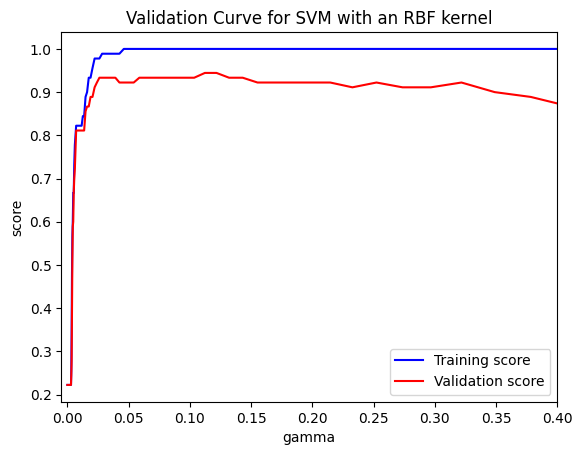

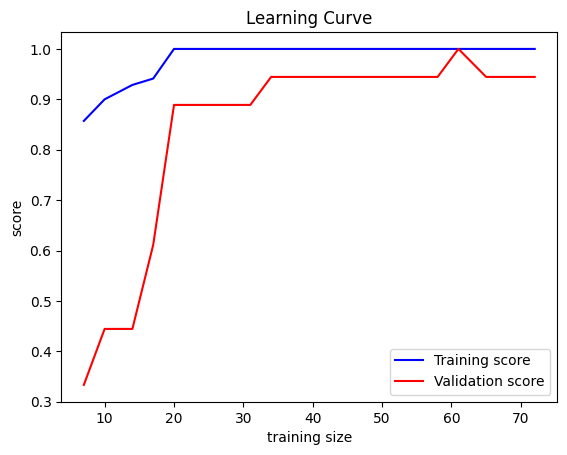

In [311]:
#Validation curve ==================================================
from sklearn.model_selection import validation_curve
gamma = np.logspace(-7, 0, num=200)
train_score, val_score = validation_curve(SVC(), hog_descriptors_train, labels_train, param_name='gamma', param_range=gamma, cv=2)
#print(train_score, "\n", val_score)

fig = plt.figure()
ax = plt.axes()
plt.plot(gamma, np.median(train_score, 1), color='blue', label='Training score')
plt.plot(gamma, np.median(val_score, 1), color='red', label='Validation score')
plt.legend(loc='best')
plt.title("Validation Curve for SVM with an RBF kernel")
plt.xlim(-0.005, 0.4)
plt.xlabel('gamma')
plt.ylabel('score')
plt.show()

# Learning Curve====================================================
from sklearn.model_selection import learning_curve
size = np.linspace(0.1, 1, 20)
train_size, train_score, val_score = learning_curve(SVC(), hog_descriptors_train, labels_train, 
                                            train_sizes=size, cv=5, scoring='accuracy', n_jobs=1)

fig = plt.figure()
ax = plt.axes()
plt.plot(train_size, np.median(train_score, 1), color='blue', label='Training score')
plt.plot(train_size, np.median(val_score, 1), color='red', label='Validation score')
plt.legend(loc='best')
plt.title("Learning Curve")
plt.xlabel('training size')
plt.ylabel('score')
plt.show()

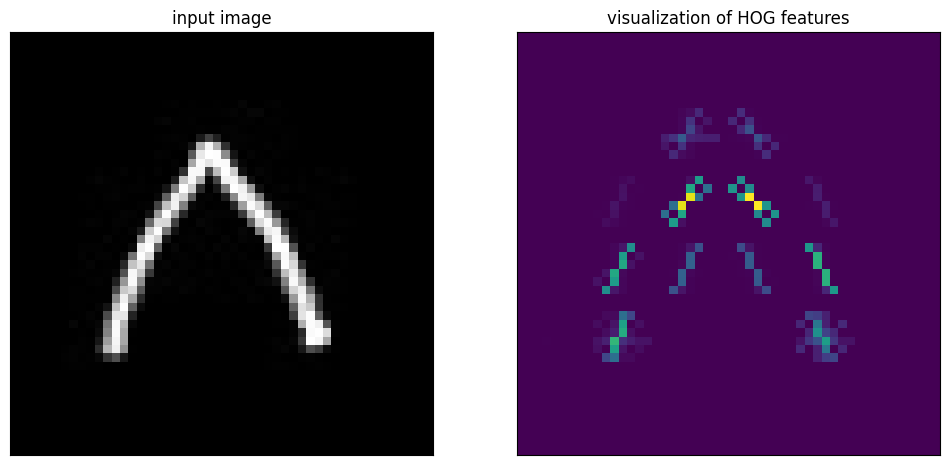

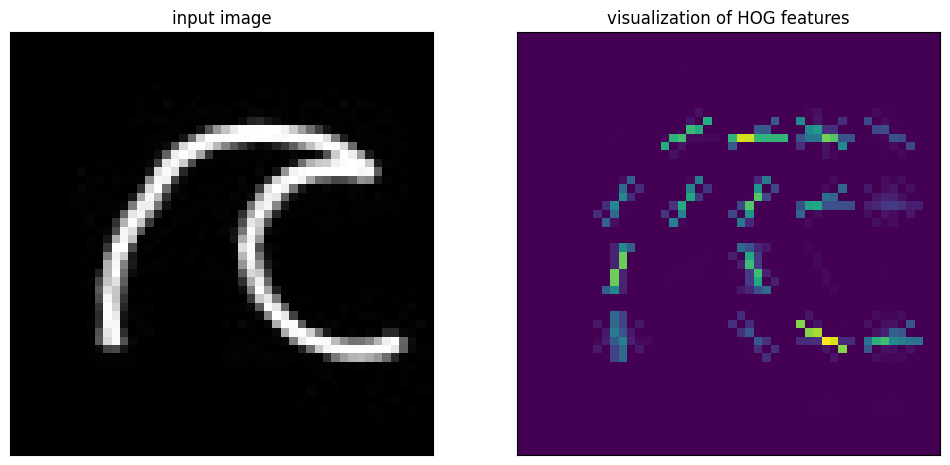

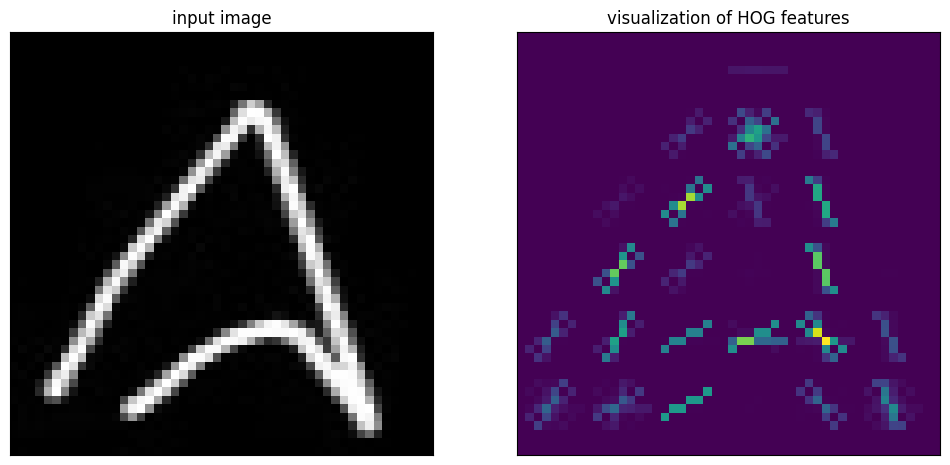

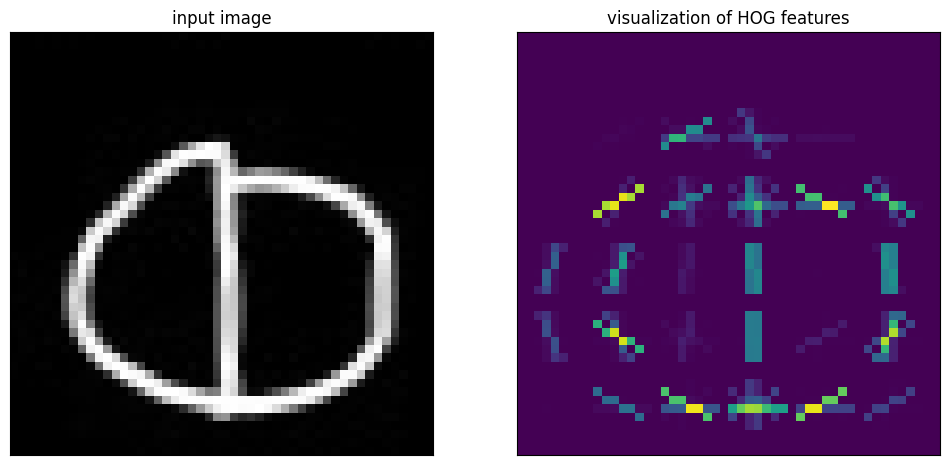

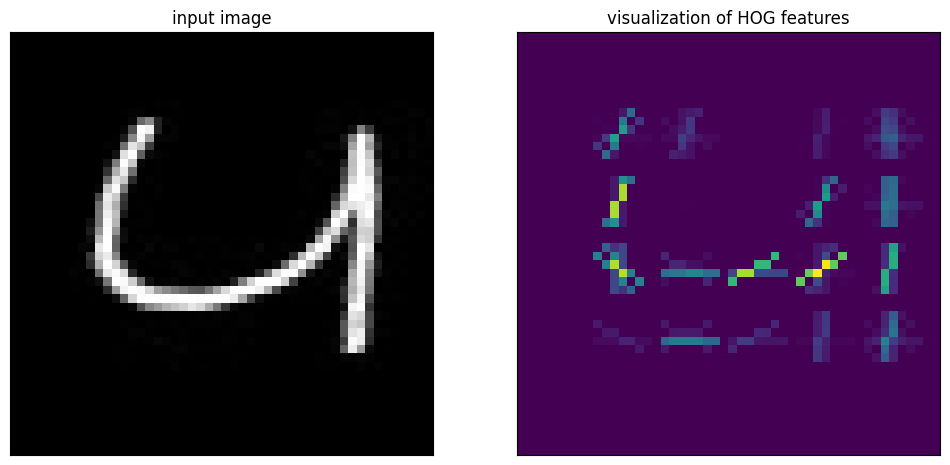

In [309]:
#HOG feature visualization
from skimage import feature

spells, labels = load_spells('train_spells.jpg')
spells_deskewed = list(map(deskew, spells))

for i in range(0, 100, 20):
    hog_vec, hog_vis = feature.hog(spells_deskewed[i], visualize=True)
    fig, ax = plt.subplots(1, 2, figsize=(12, 6), subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow(spells_deskewed[i], cmap='gray')
    ax[0].set_title('input image')

    ax[1].imshow(hog_vis)
    ax[1].set_title('visualization of HOG features')
    plt.show()